# Notebook for exploring data retrieved with filter sets.

## General Setup

In [3]:
%matplotlib inline
import sqlite3
import pprint
import json
import pandas as pd
import numpy as np
#import geopandas as gpd
pd.set_option('display.width', 600)
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.max_rows', 150)
from IPython.display import Image
from pygbif import occurrences
import matplotlib.pyplot as plt
import os
from datetime import datetime
t1 = datetime.now()

### Config file
Some of the scripts below pull common variables from a config file.  This is so in order to reduce redundancy and also facilitates running scripts outside of jupyter notebooks.  However, variables need to be able to be set in notebooks too, so the cell below deletes and then rewrites the config file according to what to you want for this notebook.

In [4]:
# Set variables in the following text string, not variable assignment below.
text = """#NOTE! this is overwritten by some notebooks, so update everywhere, if adding lines.
sp_id = 'bybcux0'
summary_name = 'cuckoo'
gbif_req_id = 'GBIF_r5'
gbif_filter_id = 'GBIF_f2'
ebird_req_id = None
ebird_filter_id = None
evaluation = 'eval_gbif1'
workDir = '/Users/nmtarr/Documents/RANGES/'
codeDir = '/Users/nmtarr/Code/range_map_evaluation/'
inDir = workDir + 'Inputs/'
outDir = workDir + 'Outputs/'
default_coordUncertainty = 500
SRID_dict = {'WGS84': 4326, 'AlbersNAD83': 102008} # Used in file names for output.
spdb = outDir + sp_id + '_occurrences.sqlite' # Name of species occurrence db.
"""
f = open('config.py', 'w')
f.write(text)
f.close()

import config
species_id = config.sp_id
summary_name = config.summary_name
request_id = config.gbif_req_id
filter_id = config.gbif_filter_id
inDir = config.inDir
outDir = config.outDir

In [5]:
connjup = sqlite3.connect('/users/nmtarr/documents/ranges/inputs/rng_eval_params.sqlite')
cursorjup = connjup.cursor()

## Species Concept

In [6]:
vals = cursorjup.execute("SELECT * FROM species_concepts;").fetchall()[0]
cols = [x[1] for x in cursorjup.execute("PRAGMA table_info('species_concepts')").fetchall()]
pprint.pprint(dict(zip(cols, vals)))

{'bcb_id': None,
 'breeding_months': '4,5,6,7,8',
 'common_name': 'yellow-billed cuckoo',
 'detection_distance_meters': 100,
 'end_year': None,
 'error_tolerance': 40,
 'fws_id': None,
 'gap_id': 'bybcux',
 'gbif_id': '2496287',
 'geometry': None,
 'itis_tsn': '177831',
 'migratory': '1',
 'notes': 'Manually entered for use in development. ',
 'pad': 2,
 'scientific_name': 'Coccyzus americanus',
 'species_id': 'bybcux0',
 'start_year': None,
 'wintering_months': '11,12,1,2'}


## Filters

In [7]:
df1 = pd.read_sql_query(sql="SELECT * FROM gbif_requests WHERE request_id = '{0}'".format(request_id), con=connjup)
print("THE REQUEST FILTER SET")
print(df1.loc[0])

THE REQUEST FILTER SET
request_id                     GBIF_r5
source                            GBIF
lat_range                        27,41
lon_range                      -91,-75
years_range                  1999,2002
months_range                       4,8
geoissue                          None
coordinate                        True
continent                         None
creator                        N. Tarr
notes           Used in development.  
Name: 0, dtype: object


In [8]:
df2 = pd.read_sql_query(sql="SELECT * FROM gbif_filters WHERE filter_id = '{0}'".format(filter_id), con=connjup)
print("THE POST REQUEST FILTER SET")
print(df2.loc[0])

THE POST REQUEST FILTER SET
filter_id                                                                         GBIF_f2
source                                                                               GBIF
has_coordinate_uncertainty                                                              0
creator                                                                           N. Tarr
notes                         Used for development.  An open filter; should not remove...
Name: 0, dtype: object


## Run Query

In [2]:
# Run a script that retrieves and filters
%run 'retrieve_occurrences.py'

downloading https://www.sciencebase.gov/catalog/file/get/59f5e201e4b063d5d307dc0f?f=__disk__89%2Fbb%2F19%2F89bb19045ef553fdf3a05056b81618649e77e351 to /Users/nmtarr/Documents/RANGES/Inputs/bYBCUx_CONUS_Range_2001v1.zip
downloading https://www.sciencebase.gov/catalog/file/get/59f5e201e4b063d5d307dc0f?f=__disk__db%2Fb5%2F9a%2Fdbb59a7ae14e77d87bd9a6f527f91dd55e577628 to /Users/nmtarr/Documents/RANGES/Inputs/bYBCUx_CONUS_Range_2001v1.xml
9441 records exist
INSERT INTO values_of_interest (field, vals) VALUES ("datums", "['WGS84']");
INSERT INTO values_of_interest (field, vals) VALUES ("issues", "['GEODETIC_DATUM_ASSUMED_WGS84', 'GEODETIC_DATUM_INVALID', 'ELEVATION_MIN_MAX_SWAPPED', 'TAXON_MATCH_HIGHERRANK', 'COORDINATE_ROUNDED']");
INSERT INTO values_of_interest (field, vals) VALUES ("bases", "['MACHINE_OBSERVATION', 'OBSERVATION', 'HUMAN_OBSERVATION', 'PRESERVED_SPECIMEN']");
INSERT INTO values_of_interest (field, vals) VALUES ("institutions", "['Borror Laboratory of Bioacoustics, Ohio Sta

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordinate uncertainty - using default value of 500
No coordin

## Results

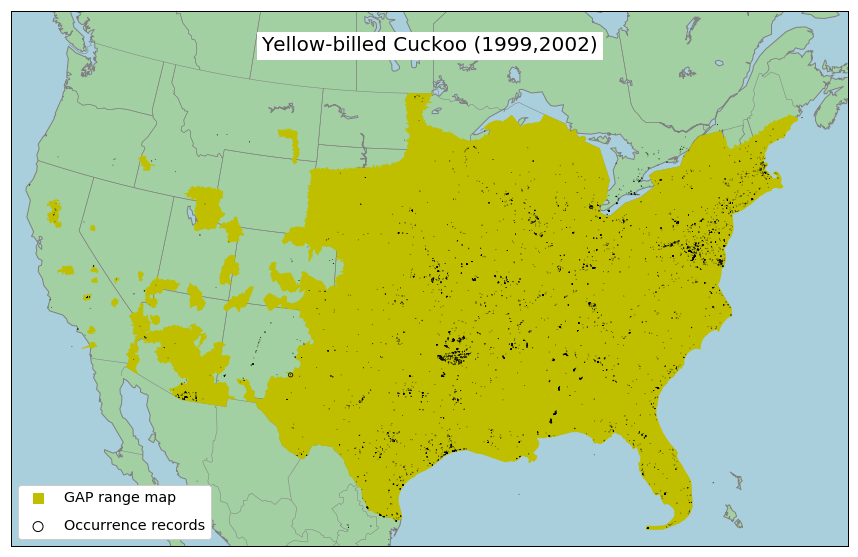

In [9]:
gap_range2 = "{0}{1}_range_4326".format(inDir, gap_id)

shp1 = {'file': gap_range2, 'column': None, 'alias': 'GAP range map',
        'drawbounds': False, 'linewidth': .5, 'linecolor': 'y',
        'fillcolor': 'y', 'marker':'s'}

shp2 = {'file': '{0}{1}_circles'.format(outDir, summary_name), 'column': None,
        'alias': 'Occurrence records', 'drawbounds': True, 'linewidth': .75, 'linecolor': 'k',
        'fillcolor': None, 'marker':'o'}

# Display occurrence polygons
title="Yellow-billed Cuckoo ({0})".format(years)
functions.MapShapefilePolygons(map_these=[shp1, shp2], title=title)

### Where were records retrieved from?

In [10]:
tables = cursorjup.execute("SELECT table_name FROM table_descriptions").fetchall()
tables = [x[0] for x in tables]

filter_sets = [request_id, filter_id]

sources = []
for s in filter_sets:
    s = s.strip()
    for tab in tables:
        columns = cursorjup.execute("SELECT column_name FROM column_descriptions WHERE table_name = '{0}'".format(tab)).fetchall()
        columns = [x[0] for x in columns]
        for col in columns:
            try:
                a = cursorjup.execute("SELECT source FROM {1} WHERE {2} = '{0}'".format(s, tab, col)).fetchone()[0]
                sources.append(a)
            except:
                pass
print(list(set(sources))[0])

GBIF


### How many records made it through the filters?

In [11]:
conn_occ= sqlite3.connect(outDir + species_id + "_occurrences.sqlite")
curs_occ = conn_occ.cursor()
record_count = curs_occ.execute("SELECT COUNT(occ_id) FROM occurrences WHERE species_id = '{0}'".format(species_id)).fetchone()
print(str(record_count[0]) + " records made it through the filters")

9441 records made it through the filters


### What years were represented in the data?

Text(0.5, 1.0, 'Occurrences per Year')

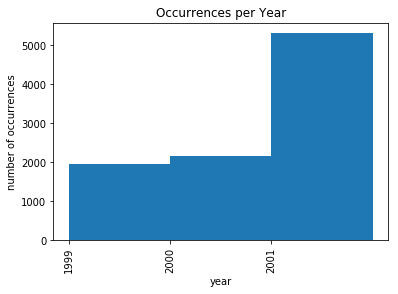

In [53]:
occ_years = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%Y', occurrenceDate) FROM occurrences").fetchall()]
years = connjup.execute("SELECT years_range FROM gbif_requests WHERE request_id = '{0}'".format(config.gbif_req_id)).fetchone()[0]
years = years.split(',')
yearsrng = list(range(int(years[0]), int(years[1]), 1))
binsnum = int(years[1]) - int(years[0])
plt.hist(occ_years, bins=binsnum)
plt.ylabel("number of occurrences")
plt.xlabel("year")
plt.xticks(yearsrng, rotation=90)
plt.title("Occurrences per Year")

### What months were represented in the data?

Text(0.5, 1.0, 'Occurrences per Month')

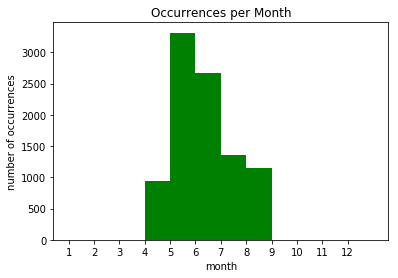

In [13]:
occ_months = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%m', occurrenceDate) FROM occurrences").fetchall()]
plt.hist(occ_months, bins=range(1, 14), color="g")
plt.ylabel("number of occurrences")
plt.xlabel("month")
plt.xticks(range(1, 13))
plt.title("Occurrences per Month")

### What is the distribution of coordinate uncertainty values?

Text(0.5, 1.0, 'Coordinate Uncertainty')

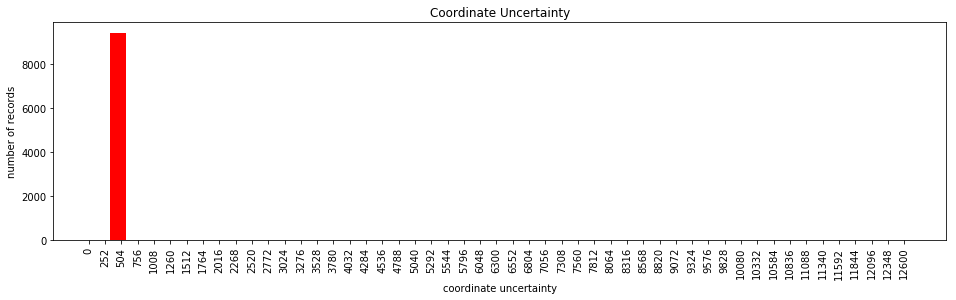

In [14]:
occ_cert = [int(x[0]) for x in curs_occ.execute("SELECT coordinateUncertaintyInMeters FROM occurrences").fetchall()]
maxi = np.max(occ_cert)
plt.figure(figsize=(16,4))
plt.hist(occ_cert, bins=50, color="r")
plt.xticks(range(0, maxi, int(maxi/50)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("coordinate uncertainty")
plt.title("Coordinate Uncertainty")

Text(0.5, 1.0, 'Coordinate Uncertainty')

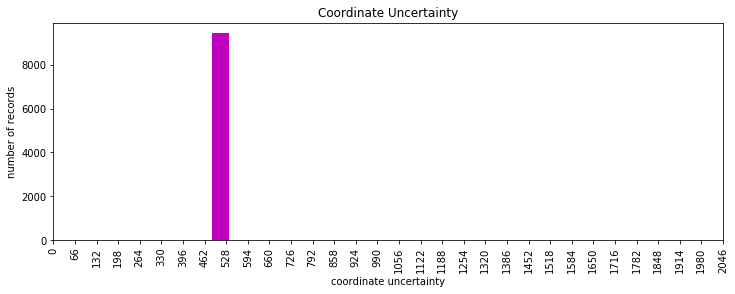

In [15]:
rng_max = 2000
occ_cert2 = [x for x in occ_cert if x <= rng_max]
plt.figure(figsize=(12,4))
plt.hist(occ_cert2, bins=30, color="m", align='mid')
plt.xticks(range(0, rng_max + 100, int(rng_max/30.)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("coordinate uncertainty")
plt.title("Coordinate Uncertainty")

### What geodetic datums were present in the data?

In [16]:
datums = curs_occ.execute("SELECT vals FROM values_of_interest WHERE field = 'datums';").fetchone()[0]
datums = datums.replace('[', '').strip().replace(']', '').replace("'", "")
datums = datums.split()
for datum in datums:
    print(datum)

WGS84


### What issues were present in the data?

In [17]:
issues = curs_occ.execute("SELECT vals FROM values_of_interest WHERE field = 'issues';").fetchone()[0]
issues = issues.replace('[', '').strip().replace(']', '').replace("'", "")
issues = issues.split(',')
for iss in issues:
    print(iss.strip())

GEODETIC_DATUM_ASSUMED_WGS84
GEODETIC_DATUM_INVALID
ELEVATION_MIN_MAX_SWAPPED
TAXON_MATCH_HIGHERRANK
COORDINATE_ROUNDED


### What were the bases of the records?

In [18]:
bases = curs_occ.execute("SELECT vals FROM values_of_interest WHERE field = 'bases';").fetchone()[0]
bases = bases.replace('[', '').strip().replace(']', '').replace("'", "")
bases = bases.split(",")
for bas in bases:
    print(bas.strip())

MACHINE_OBSERVATION
OBSERVATION
HUMAN_OBSERVATION
PRESERVED_SPECIMEN


### What institutions provided the records?

In [20]:
institutions = curs_occ.execute("SELECT vals FROM values_of_interest WHERE field = 'institutions';").fetchone()[0]
institutions = institutions.replace('[', '').strip().replace(']', '').replace("'", "")
institutions = institutions.split(',')
for ins in institutions:
    print(ins.strip())

Borror Laboratory of Bioacoustics
Ohio State University
Columbus
OH (BLB)
urn:lsid:biocol.org:col:34495
urn:lsid:biocol.org:col:34939
http://biocol.org/urn:lsid:biocol:org:34802
1
naturgucker
ROM
BSC; Bird Studies Canada - Etudes dOiseaux Canada
urn:lsid:biocol.org:col:34834
http://grbio.org/cool/iakn-125z
UMMZ
urn:lsid:biocol.org:col:34878
UNKNOWN
http://biocol.org/urn:lsid:biocol.org:col:34795
urn:lsid:biocol.org:col:35013
819004460-4
PRBO
CLO
http://biocol.org/urn:lsid:biocol.org:col:34871


### What data collections were included?

In [21]:
collections = curs_occ.execute("SELECT vals FROM values_of_interest WHERE field = 'collections';").fetchone()[0]
collections = collections.replace('[', '').strip().replace(']', '').replace("'", "")
collections = collections.split(',')
for colls in collections:
    print(colls.strip())

EBIRD_LWBA
ML
EBIRD_TX
EBIRD_CAN
AVES
Birds
Bird sounds
birds
MMP; Marsh Monitoring Program
Bird Records
EBIRD_BCN
EBIRD_QC
PRBO-PC
EBIRD_CAMERICA
AV
naturgucker
NO APLICA
EBIRD_AU
EBIRD_PA
EBIRD
Bird
Bird specimens
EBIRD_AK
EBIRD_NH
Recordings
EBIRD_VINS
EBIRD_MA
EBIRD_VA
EBIRD_PNW
EBIRD_POR
EBIRD_NJ
EBIRD_WI


### Were there duplicate records?

In [22]:
dups0 = curs_occ.execute("SELECT COUNT(occ_id) FROM occurrences GROUP BY geom_xy4326, occurrenceDate;").fetchall()
dups1 = [x[0] for x in dups0]
dups2 = [x for x in dups1 if x > 1]
print(str(len(dups2)) + ' records were duplicates based on xy coordinate and date-time')

669 records were duplicates based on xy coordinate and date-time


### What keys/fields were returned for the records?

In [23]:
fields_summary = pd.read_sql("SELECT * FROM gbif_fields_returned", conn_occ, index_col='index')
fields_summary.index.name = 'field'
print(fields_summary)

                                  included(n)  populated(n)
field                                                      
acceptedNameUsage                           3             3
acceptedScientificName                   9441          9441
acceptedTaxonKey                         9441          9441
accessRights                               30            30
associatedSequences                         1             1
associatedTaxa                              2             2
basisOfRecord                            9441          9441
behavior                                   12            12
bibliographicCitation                       4             4
catalogNumber                            9441          9441
class                                    9441          9441
classKey                                 9441          9441
collectionCode                           9441          9441
collectionID                               19            19
continent                               

### Runtime

In [24]:
t2 = datetime.now()
print(t2 - t1)

0:03:07.761997
